# Iris Data Decision Tree Classify

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [2]:
irisSet = load_iris()

## Figure Parameters

In [3]:
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

## Train

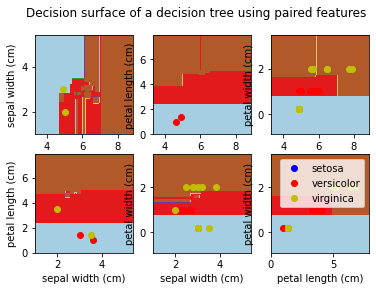

In [4]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):  # 只选用iris中的2个feature
    X = irisSet.data[:, pair]
    y = irisSet.target

    dt = DecisionTreeClassifier().fit(X, y)  # 训练

    # 绘制决策边界
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    # print(np.c_[xx.ravel(), yy.ravel()])
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.xlabel(irisSet.feature_names[pair[0]])
    plt.ylabel(irisSet.feature_names[pair[1]])
    plt.axis("tight")

    # 绘制训练点
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(X == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=irisSet.target_names[i], cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()